@Mukul sharma
mukulsharma9988a@gmail.com
Github:mukulsharma421


**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

**DATA PREPERATION**

In [4]:
#data collection
#loading dataset into pandas dataframe
train_df = pd.read_csv(r'spam.csv')

In [5]:
train_df.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

KeyError: "['author'] not found in axis"

In [ ]:
train_df.shape

(20800, 2)

In [ ]:
train_df.head(15)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
train_df.isna().sum()

text     39
label     0
dtype: int64

In [7]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

ValueError: Could not interpret input 'label'

In [8]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
check finished.


In [9]:
train_df = train_df.dropna()

In [10]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
check finished.


In [11]:
train_df.shape

(5572, 2)

In [12]:
train_df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [13]:
train_df.reset_index(drop= True,inplace=True)

In [14]:
train_df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
label_train = train_df.Category

In [17]:
label_train.head(10)

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: Category, dtype: object

In [18]:
train_df = train_df.drop("label", axis = 1)

KeyError: "['label'] not found in axis"

In [19]:
train_df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [20]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [21]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:

for x in range(len(train_df)) :
    corpus = []
    review = train_df['Message'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['Message'][x] = review      

In [25]:
train_df['text'][2182]

KeyError: 'text'

In [27]:

X_train, X_test, Y_train, Y_test = train_test_split(train_df['Message'], label_train, test_size=0.2, random_state=0)

In [28]:
X_train

1114                       im good movie ok leave hourish
3589    wereare free give otherwise nalla adi entey na...
3095             emigrated something ok maybe bit hopeful
1012                            got home babe still awake
3320                                    kay since already
                              ...                        
4931    hi sexychat girl waiting text text great night...
3264                                 u gon na get deus ex
1653    ur chance win cash every wk txt action tscs ww...
2607                    r u sam p eachother meet go house
2732               mm feeling sleepy today shall get dear
Name: Message, Length: 4457, dtype: object

In [29]:
X_train.shape

(4457,)

In [30]:
Y_train

1114     ham
3589     ham
3095     ham
1012     ham
3320     ham
        ... 
4931    spam
3264     ham
1653    spam
2607     ham
2732     ham
Name: Category, Length: 4457, dtype: object

In [31]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [32]:
print(tfidf_X_train,tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36210 stored elements and shape (4457, 7052)>
  Coords	Values
  (0, 2742)	0.6250666207646753
  (0, 3318)	0.39697785730582724
  (0, 4173)	0.2886987967248195
  (0, 3842)	0.45981020452508997
  (0, 2400)	0.30332175322737587
  (0, 2852)	0.25480148158519605
  (1, 3198)	0.37207345296324484
  (1, 3934)	0.37207345296324484
  (1, 1823)	0.37207345296324484
  (1, 70)	0.37207345296324484
  (1, 3917)	0.37207345296324484
  (1, 4261)	0.303316084583739
  (1, 2360)	0.21239514239298896
  (1, 2188)	0.17959880267056394
  (1, 6694)	0.37207345296324484
  (2, 2723)	0.531491437365604
  (2, 596)	0.3551045440188211
  (2, 3635)	0.37735713689389305
  (2, 5558)	0.32599992963539726
  (2, 1792)	0.531491437365604
  (2, 4173)	0.24547933506556893
  (3, 421)	0.6317750521629788
  (3, 5735)	0.3866278540868781
  (3, 437)	0.4339896204222807
  (3, 2698)	0.3770914737170729
  :	:
  (4453, 2333)	0.2712206622162606
  (4454, 6940)	0.35438831811764787
  (4454, 1337)	0.32

In [33]:
tfidf_X_train.shape

(4457, 7052)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 99.01%
Confusion matrix, without normalization


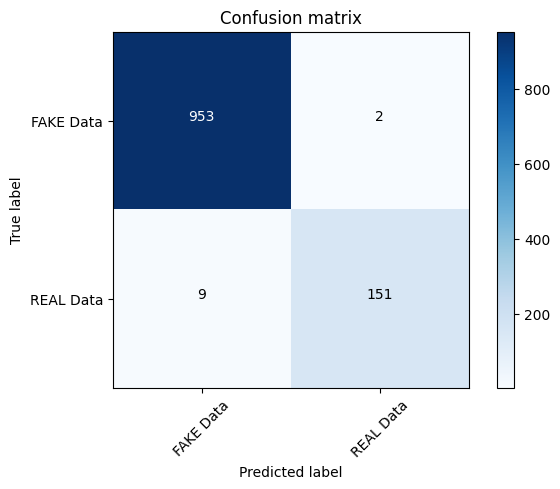

In [36]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       955
        spam       0.99      0.94      0.96       160

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [38]:
#pickling the model into disk
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

In [39]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))
#vector_form = pickle.load(open('vector.pkl', 'rb'))

In [40]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))     
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")
      

In [41]:
X_test

4456    storming msg wen u lift phne u say hello u knw...
690     forwarded please call immediately urgent messa...
944     also ive sorta blown couple time recently id r...
3768                            sir goodmorning free call
1189         come alivebetter correct good looking figure
                              ...                        
2906    ha dont know either clever simple thing pear d...
1270                       tee hee lecture cheery bye bye
3944    got call landline number asked come anna nagar...
2124                                                error
253                                              doinghow
Name: Message, Length: 1115, dtype: object

In [44]:
X_test[253]

'doinghow'

In [46]:
Y_test[253]

'ham'

In [44]:
news=str(input("Enter the News:"))
fake_news_det(news)

Prediction of the News :  Looking Fake⚠ News📰 


In [45]:
print(tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1069667 stored elements and shape (4153, 146627)>
  Coords	Values
  (0, 145280)	0.01844485042315303
  (0, 144977)	0.015457223015016446
  (0, 144768)	0.01911901451687839
  (0, 143706)	0.028060172274612872
  (0, 143638)	0.024905915684327463
  (0, 143556)	0.01244170261947782
  (0, 143502)	0.019148889523576598
  (0, 143491)	0.013092368332658798
  (0, 143287)	0.04511429878308437
  (0, 142833)	0.023637874719774573
  (0, 142711)	0.0181873427306572
  (0, 142467)	0.04091638686359329
  (0, 141751)	0.07891909883724228
  (0, 141250)	0.025515809871510045
  (0, 141111)	0.02754047462384038
  (0, 140999)	0.011672969609599109
  (0, 140517)	0.05100841770153681
  (0, 140096)	0.2322877037524493
  (0, 139880)	0.01863696975472698
  (0, 139865)	0.02266196492783703
  (0, 139853)	0.18401013974608527
  (0, 139704)	0.05170769876148053
  (0, 139298)	0.021476785329047655
  (0, 139014)	0.02642011645012094
  (0, 138932)	0.057786029065867724
  :	:
  (4152,

In [47]:
print(Y_test)

4456     ham
690     spam
944      ham
3768     ham
1189     ham
        ... 
2906     ham
1270     ham
3944     ham
2124    spam
253      ham
Name: Category, Length: 1115, dtype: object


In [52]:
X_new=tfidf_X_test[3]
prediction = loaded_model.predict(X_new)

if (prediction[0] == 1):
	print("Prediction of the Mail :  Looking spam⚠ mail ")
else:
	print("Prediction of the Mail : Looking hamp mail ")

Prediction of the Mail : Looking hamp mail 


In [53]:
print(Y_test[253])

ham
